Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

EDA


In [3]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
train_df['is_fraud'].value_counts()

,count
is_fraud,
0,1289169
1,7506


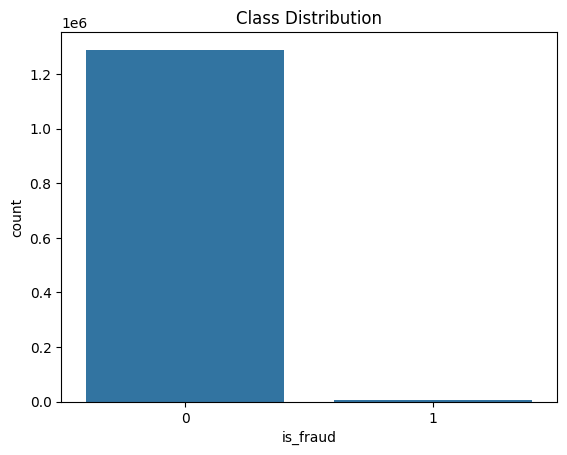

In [7]:
sns.countplot(data=train_df,x='is_fraud')
plt.title('Class Distribution')
plt.show;

Data Handling and Feature engineering

In [8]:
train_df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [9]:
train_df.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [10]:
def preprocess(df):
  df = df.copy()

  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
  df['hour'] = df['trans_date_trans_time'].dt.hour
  df['day'] = df['trans_date_trans_time'].dt.day
  df['weekday'] = df['trans_date_trans_time'].dt.weekday
  df['dob'] = pd.to_datetime(df['dob'])
  df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

  df['gender'] = LabelEncoder().fit_transform(df['gender'])
  df['category'] = LabelEncoder().fit_transform(df['category'])

  df.drop(columns=[
      'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last',
        'street', 'city', 'state', 'job', 'dob', 'trans_num', 'merchant'
  ],inplace=True)


  return df

In [11]:
train_df = preprocess(train_df)
test_df = preprocess(test_df)

In [12]:
X_train = train_df.drop('is_fraud',axis=1)
y_train = train_df['is_fraud']

X_test = test_df.drop('is_fraud',axis=1)
y_test = test_df['is_fraud']

In [13]:
Scalar = StandardScaler()
X_train = Scalar.fit_transform(X_train)
X_test = Scalar.transform(X_test)

Training

In [14]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

Logistic Regression Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

[[553232    342]
 [  2145      0]]


In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Results
[[552308   1266]
 [   448   1697]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.57      0.79      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.79      0.89      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [17]:
rt = RandomForestClassifier(n_estimators=30,max_depth=10,max_features='sqrt',random_state=42)
rt.fit(X_train,y_train)
y_pred_rt = rt.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test,y_pred_rt))
print(confusion_matrix(y_test,y_pred_rt))

Random Forest Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.96      0.54      0.69      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.77      0.85    555719
weighted avg       1.00      1.00      1.00    555719

[[553531     43]
 [   984   1161]]


In [18]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_linear_svc = linear_svc.predict(X_test)

print("LinearSVC Results")
print(classification_report(y_test, y_pred_linear_svc))
print(confusion_matrix(y_test, y_pred_linear_svc))


LinearSVC Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

[[553511     63]
 [  2145      0]]


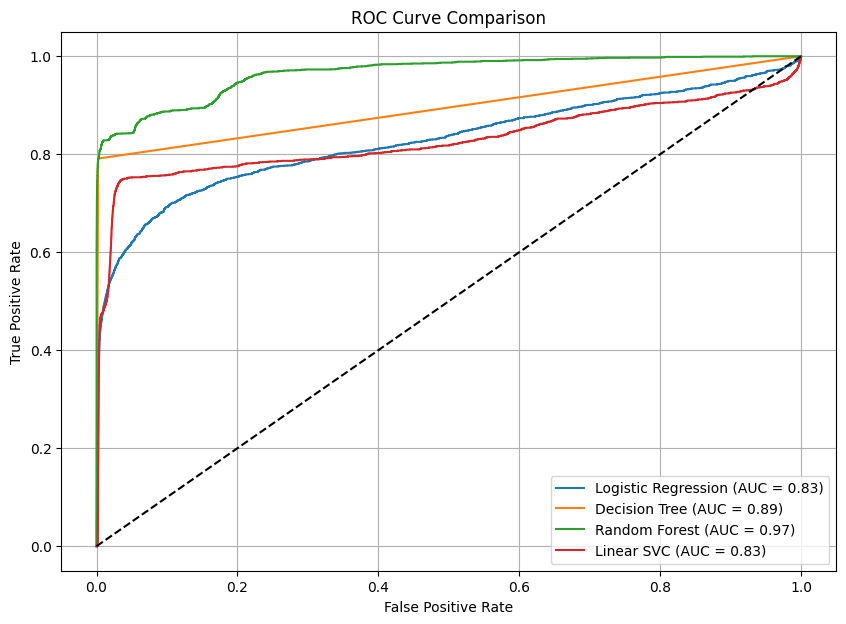

In [20]:
plt.figure(figsize=(10, 7))

# Logistic Regression
y_score_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
auc_lr = roc_auc_score(y_test, y_score_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# Decision Tree
y_score_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
auc_dt = roc_auc_score(y_test, y_score_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Random Forest
y_score_rf = rt.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
auc_rf = roc_auc_score(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Linear SVC
y_score_lsvc = linear_svc.decision_function(X_test)
fpr_lsvc, tpr_lsvc, _ = roc_curve(y_test, y_score_lsvc)
auc_lsvc = roc_auc_score(y_test, y_score_lsvc)
plt.plot(fpr_lsvc, tpr_lsvc, label=f'Linear SVC (AUC = {auc_lsvc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion:

- Random Forest outperformed all other models with an AUC of 0.97.
- The dataset was highly imbalanced, so precision, recall, and AUC were used instead of accuracy.
- Feature engineering (hour, day, weekday, age) helped boost model performance.
